Grupa 5 Bartłomiej Strzelczyk, Mikołaj Golowski, Jakub Ludera 

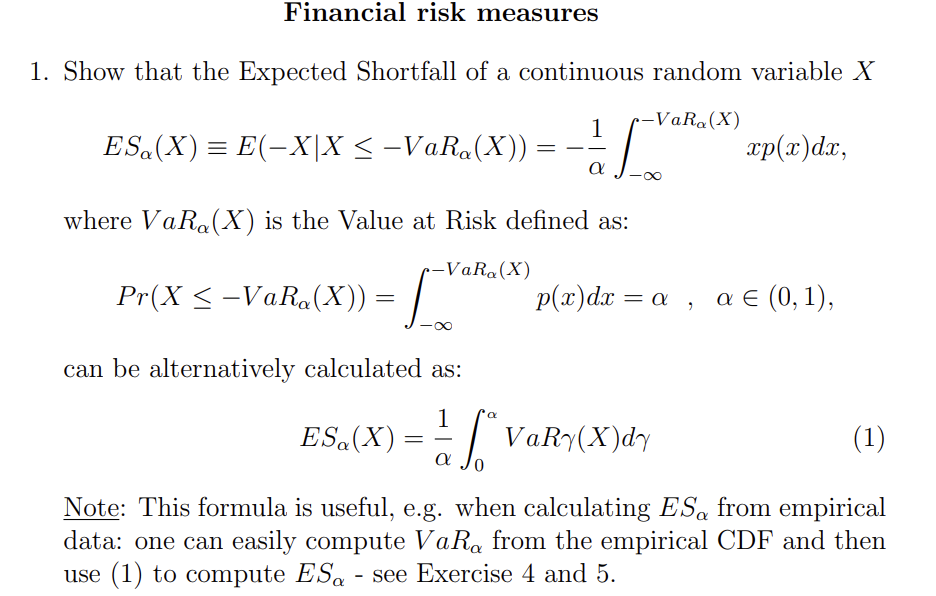

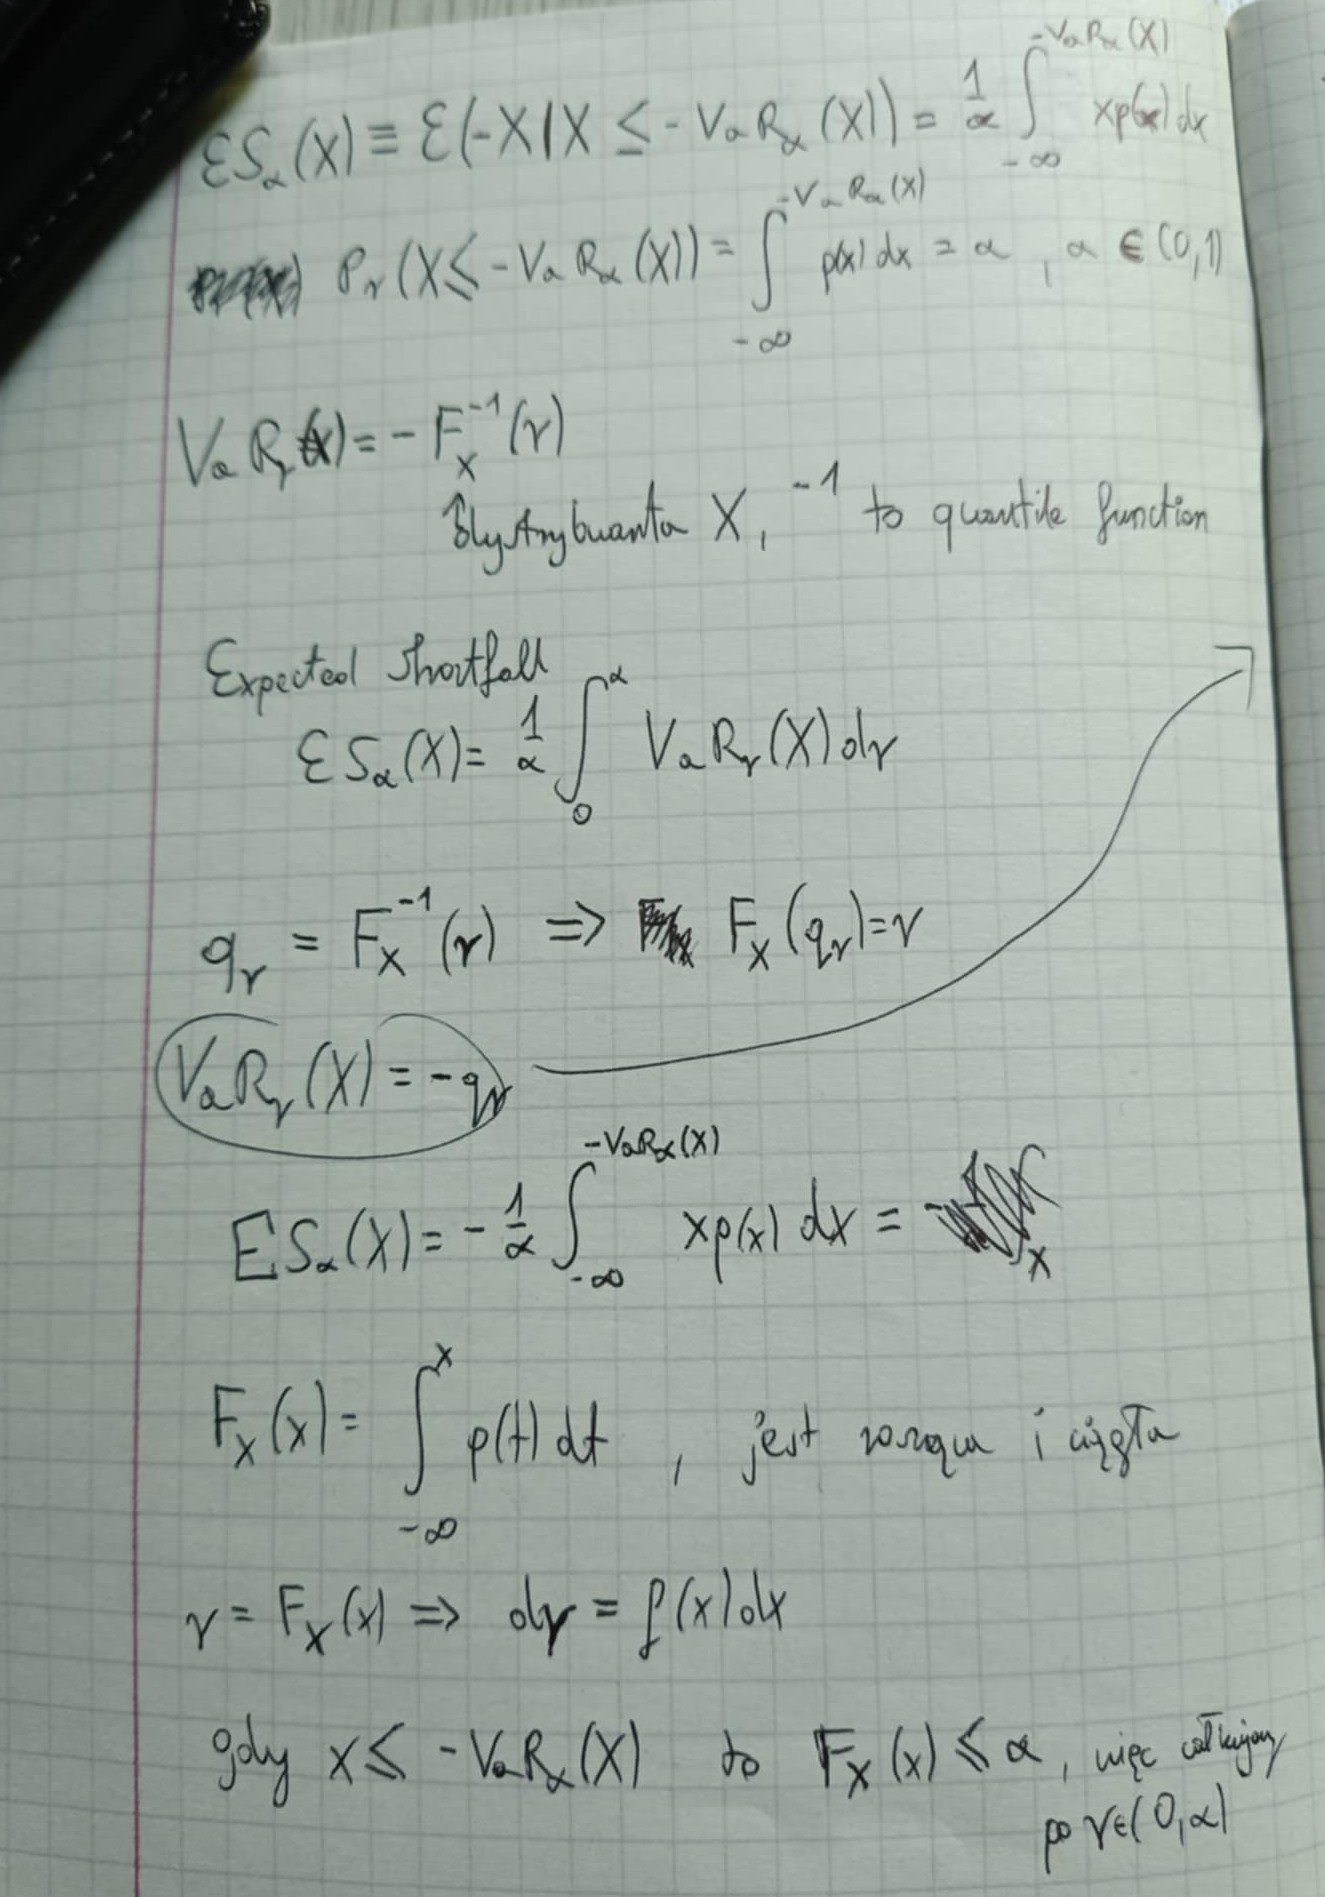

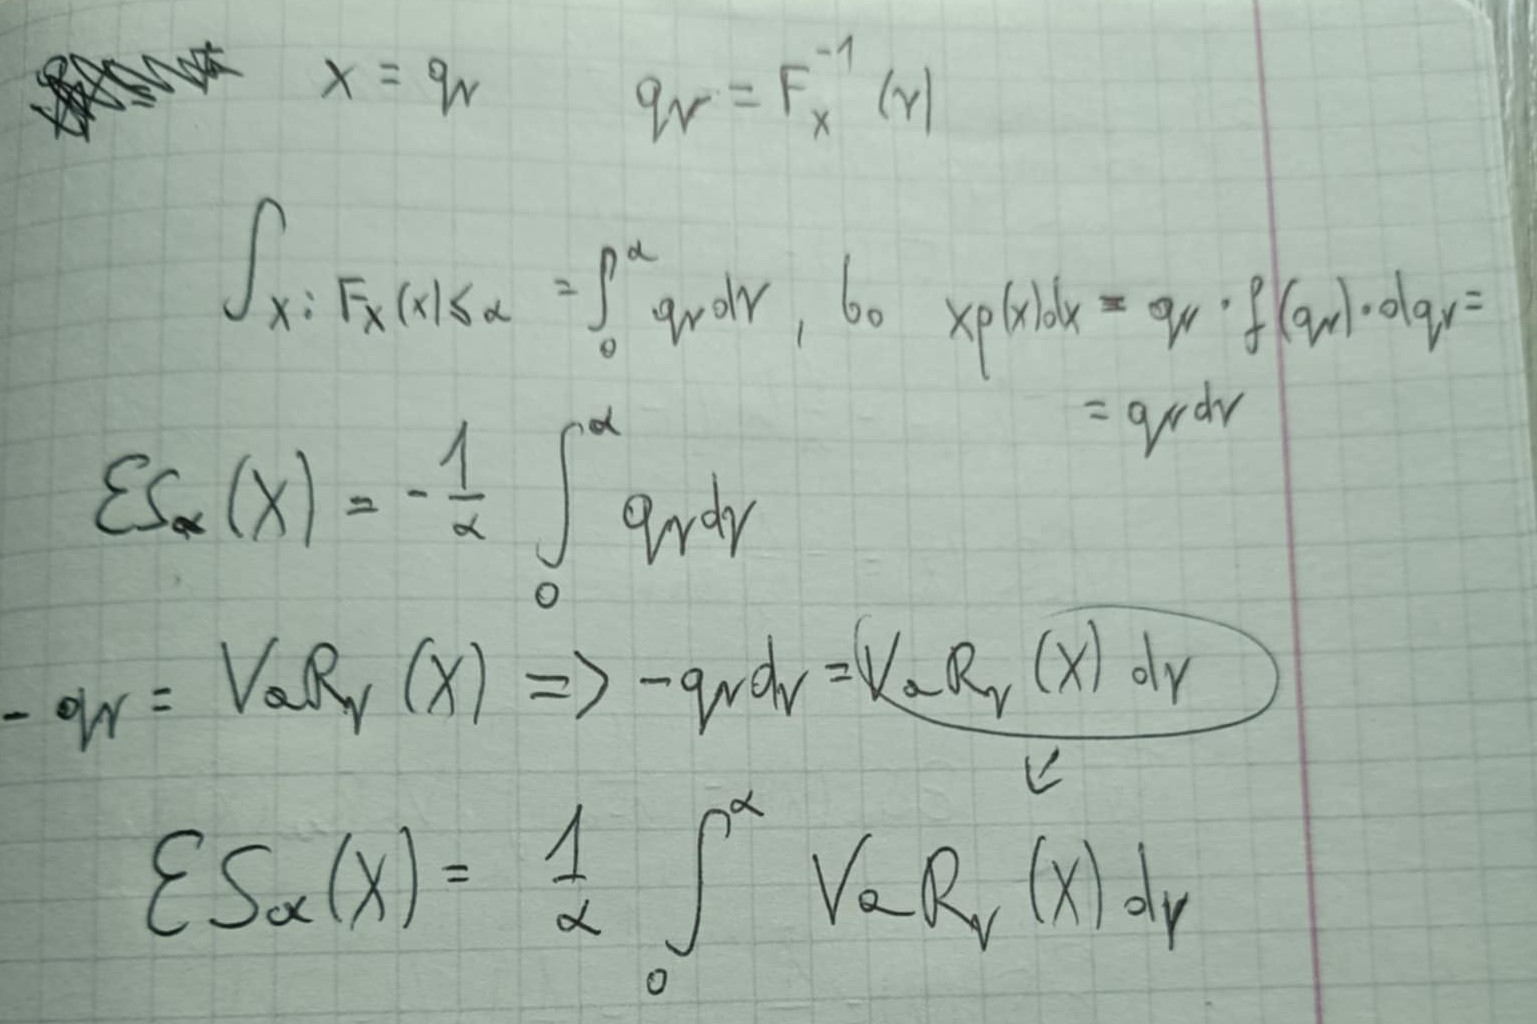

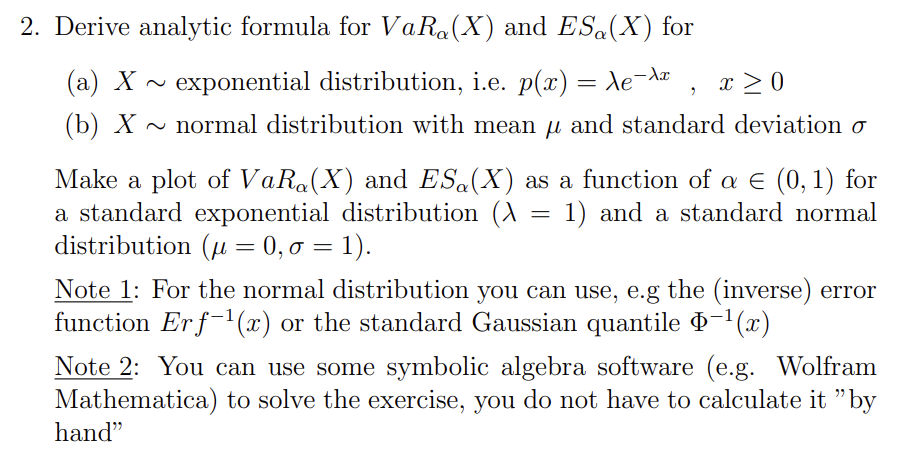

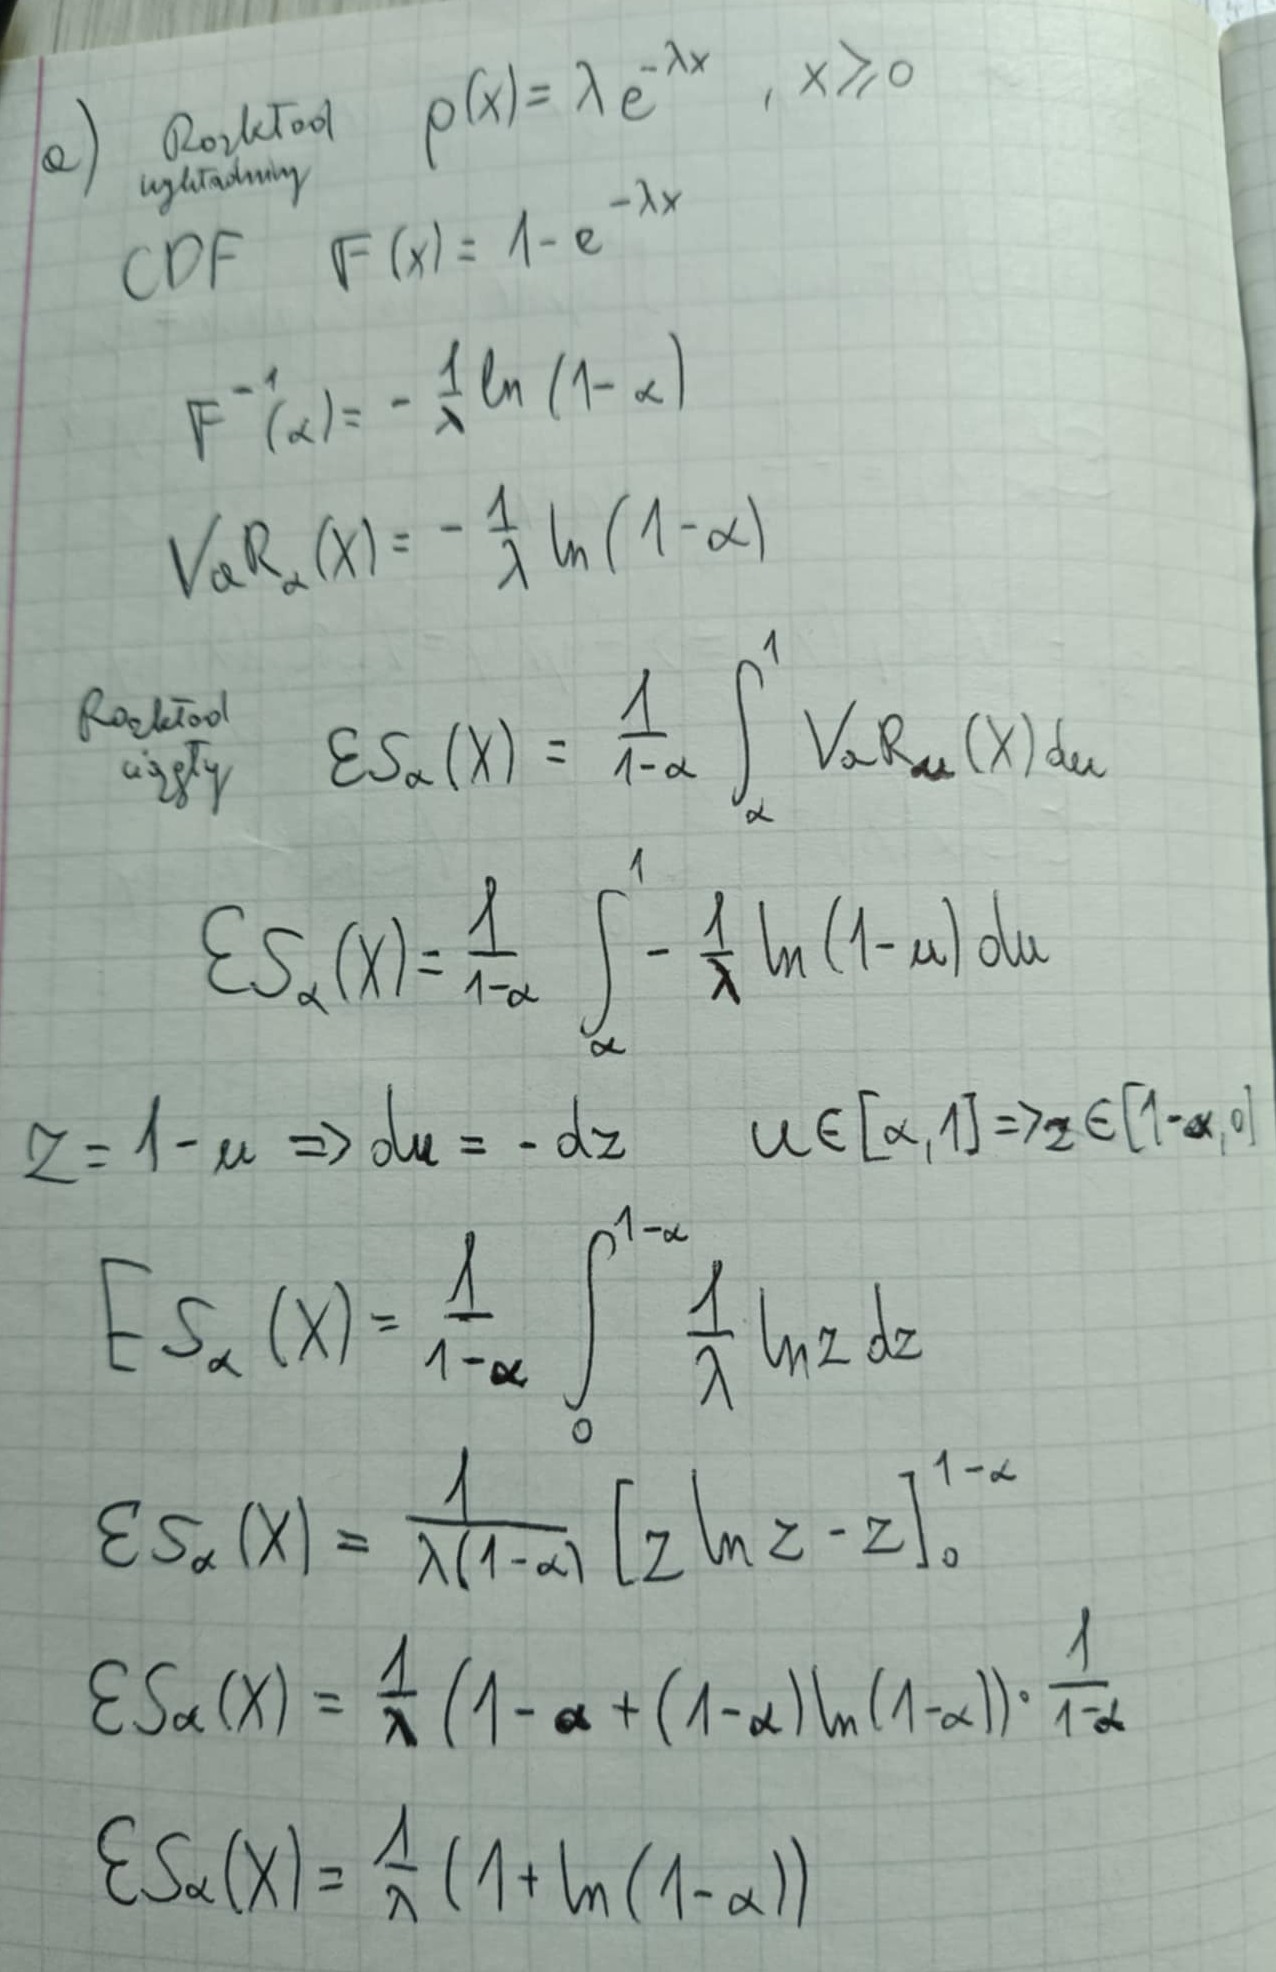

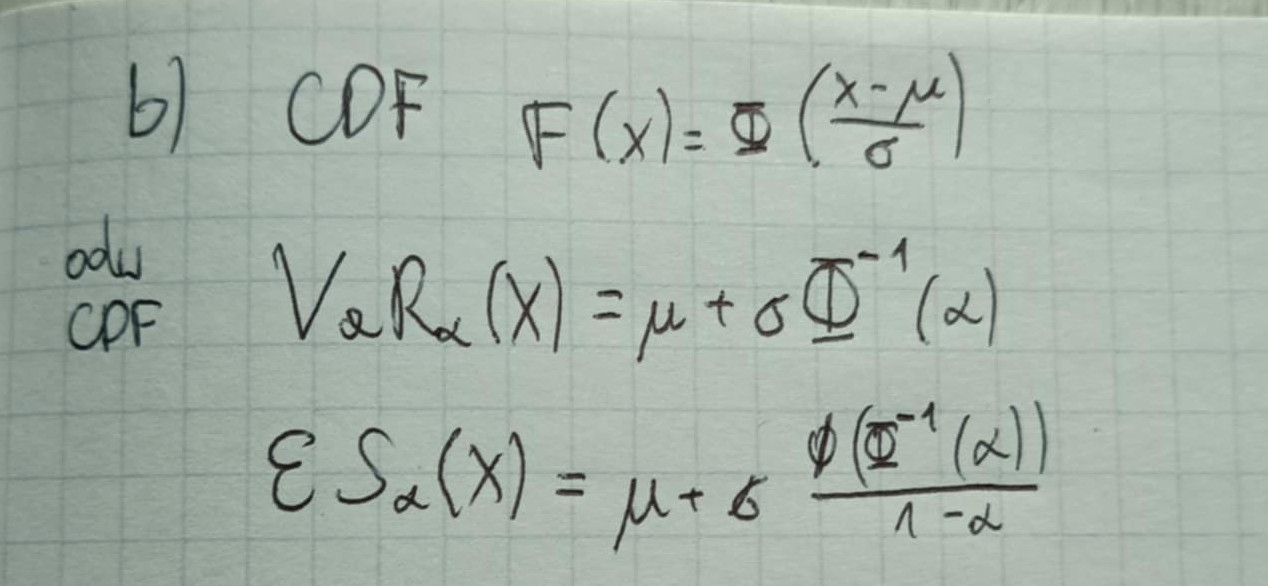

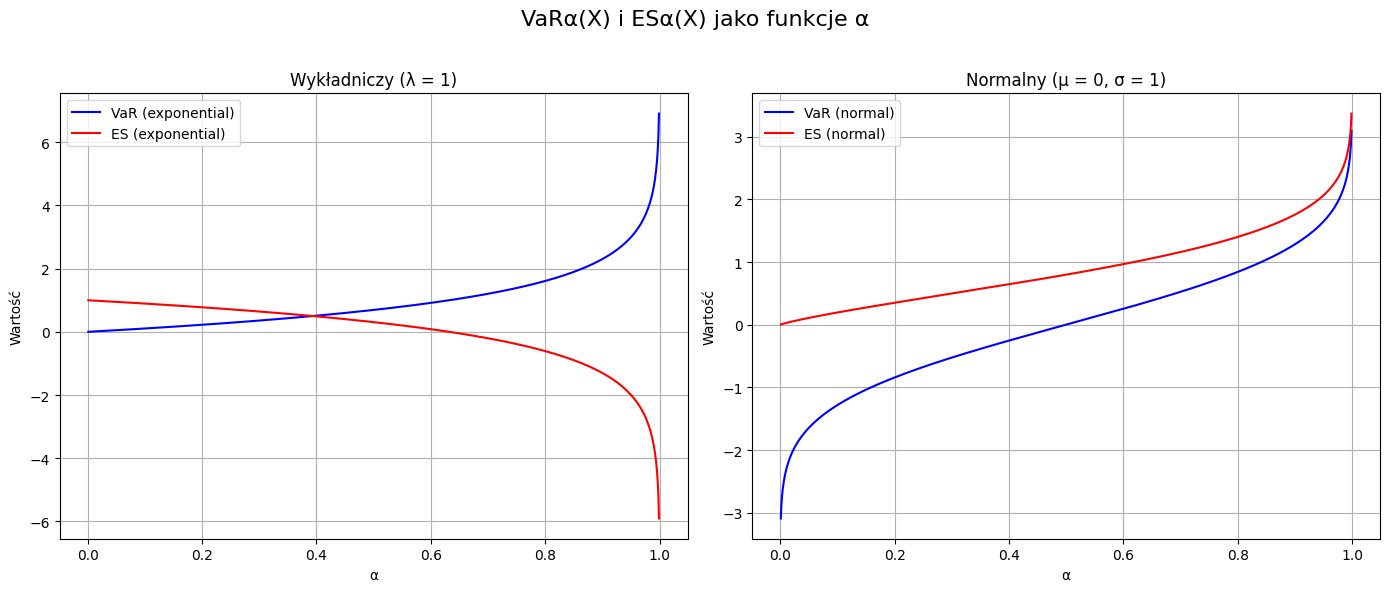

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

alpha = np.linspace(0.001, 0.999, 1000)

lambda_ = 1
VaR_exp = -np.log(1 - alpha) / lambda_
ES_exp = (1 + np.log(1 - alpha)) / lambda_

mu = 0
sigma = 1
VaR_norm = mu + sigma * norm.ppf(alpha)
ES_norm = mu + sigma * norm.pdf(norm.ppf(alpha)) / (1 - alpha)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(alpha, VaR_exp, label="VaR (exponential)", color='blue')
axs[0].plot(alpha, ES_exp, label="ES (exponential)", color='red')
axs[0].set_title("Wykładniczy (λ = 1)")
axs[0].set_xlabel("α")
axs[0].set_ylabel("Wartość")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(alpha, VaR_norm, label="VaR (normal)", color='blue')
axs[1].plot(alpha, ES_norm, label="ES (normal)", color='red')
axs[1].set_title("Normalny (μ = 0, σ = 1)")
axs[1].set_xlabel("α")
axs[1].set_ylabel("Wartość")
axs[1].legend()
axs[1].grid(True)

plt.suptitle("VaRα(X) i ESα(X) jako funkcje α", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


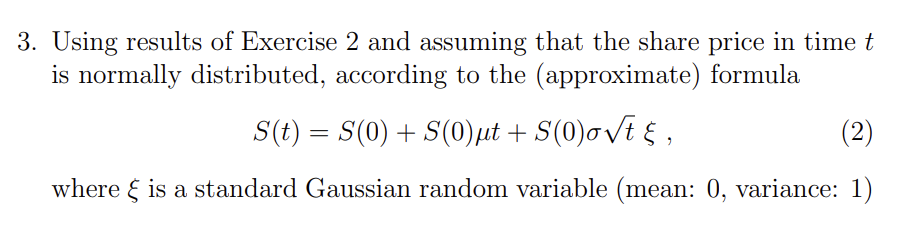

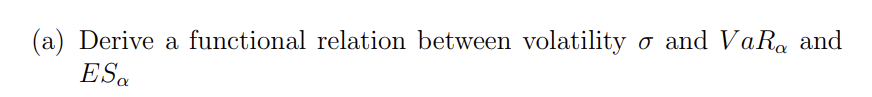

In [26]:
import numpy as np
import scipy.stats as stats

Both VaR and ES are linear in volatility σ and location 𝜇 μ

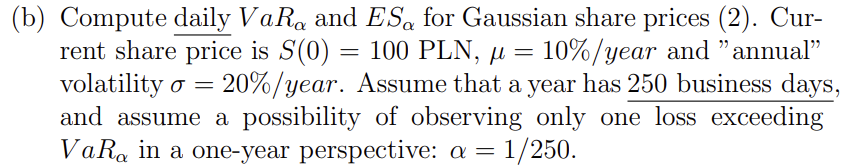

In [27]:
def norm_var_es(mu, sigma, alpha):
    # mu, sigma: mean and std of the normal distribution
    # alpha: significance level (e.g., 0.01)
    z = stats.norm.ppf(alpha)
    var = -(mu + sigma * z)
    es = -(mu + sigma * stats.norm.pdf(z) / alpha)
    return var, es


In [28]:
S0 = 100
mu_annual = 0.10
sigma_annual = 0.20
days_per_year = 250
alpha = 1/days_per_year

mu_daily = mu_annual / days_per_year
sigma_daily = sigma_annual / np.sqrt(days_per_year)

var_daily, es_daily = norm_var_es(mu_daily * S0, sigma_daily * S0, alpha)

print(f"VaR: {var_daily:.2f} PLN")
print(f"ES: {es_daily:.2f} PLN")


VaR: 3.31 PLN
ES: -3.79 PLN


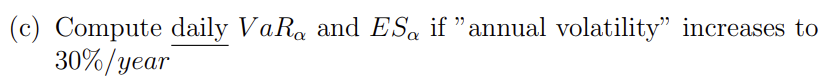

In [29]:
sigma_annual2 = 0.30
sigma_daily2 = sigma_annual2 / np.sqrt(days_per_year)

var_daily2, es_daily2 = norm_var_es(mu_daily * S0, sigma_daily2 * S0, alpha)

print(f"VaR: {var_daily2:.2f} PLN")
print(f"ES: {es_daily2:.2f} PLN")


VaR: 4.99 PLN
ES: -5.66 PLN


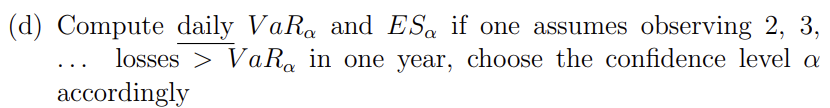

In [30]:
max_losses = 20
for k in range(1, max_losses+1):
    alpha_k = k / days_per_year
    var_k, es_k = norm_var_es(mu_daily * S0, sigma_daily * S0, alpha_k)
    print(f"{k} losses/year (α={alpha_k:.4f}): VaR={var_k:.2f} PLN, ES={es_k:.2f} PLN")


1 losses/year (α=0.0040): VaR=3.31 PLN, ES=-3.79 PLN
2 losses/year (α=0.0080): VaR=3.01 PLN, ES=-3.51 PLN
3 losses/year (α=0.0120): VaR=2.82 PLN, ES=-3.33 PLN
4 losses/year (α=0.0160): VaR=2.67 PLN, ES=-3.20 PLN
5 losses/year (α=0.0200): VaR=2.56 PLN, ES=-3.10 PLN
6 losses/year (α=0.0240): VaR=2.46 PLN, ES=-3.02 PLN
7 losses/year (α=0.0280): VaR=2.38 PLN, ES=-2.94 PLN
8 losses/year (α=0.0320): VaR=2.30 PLN, ES=-2.88 PLN
9 losses/year (α=0.0360): VaR=2.24 PLN, ES=-2.82 PLN
10 losses/year (α=0.0400): VaR=2.17 PLN, ES=-2.77 PLN
11 losses/year (α=0.0440): VaR=2.12 PLN, ES=-2.72 PLN
12 losses/year (α=0.0480): VaR=2.07 PLN, ES=-2.67 PLN
13 losses/year (α=0.0520): VaR=2.02 PLN, ES=-2.63 PLN
14 losses/year (α=0.0560): VaR=1.97 PLN, ES=-2.59 PLN
15 losses/year (α=0.0600): VaR=1.93 PLN, ES=-2.55 PLN
16 losses/year (α=0.0640): VaR=1.89 PLN, ES=-2.52 PLN
17 losses/year (α=0.0680): VaR=1.85 PLN, ES=-2.48 PLN
18 losses/year (α=0.0720): VaR=1.81 PLN, ES=-2.45 PLN
19 losses/year (α=0.0760): VaR=1.77 P

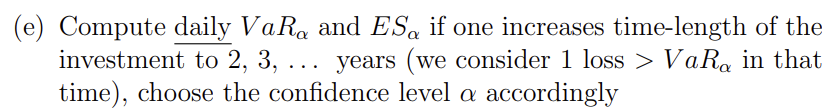

In [31]:
for years in range(2, 11):  # 2, 3, ..., 10 years
    period_days = years * days_per_year
    mu_period = mu_annual * years
    sigma_period = sigma_annual * np.sqrt(years)
    alpha_period = 1 / period_days
    var_period, es_period = norm_var_es(mu_period * S0, sigma_period * S0, alpha_period)
    print(f"For {years} years (α={alpha_period:.5f}): VaR={var_period:.2f} PLN, ES={es_period:.2f} PLN")


For 2 years (α=0.00200): VaR=61.41 PLN, ES=-109.66 PLN
For 3 years (α=0.00133): VaR=74.05 PLN, ES=-143.85 PLN
For 4 years (α=0.00100): VaR=83.61 PLN, ES=-174.68 PLN
For 5 years (α=0.00080): VaR=91.14 PLN, ES=-203.32 PLN
For 6 years (α=0.00067): VaR=97.19 PLN, ES=-230.37 PLN
For 7 years (α=0.00057): VaR=102.12 PLN, ES=-256.21 PLN
For 8 years (α=0.00050): VaR=106.14 PLN, ES=-281.07 PLN
For 9 years (α=0.00044): VaR=109.41 PLN, ES=-305.12 PLN
For 10 years (α=0.00040): VaR=112.05 PLN, ES=-328.50 PLN


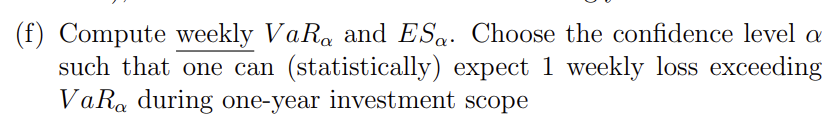

In [32]:
weeks_per_year = 50
mu_week = mu_annual / weeks_per_year
sigma_week = sigma_annual / np.sqrt(weeks_per_year)
alpha_week = 1 / weeks_per_year

var_week, es_week = norm_var_es(mu_week * S0, sigma_week * S0, alpha_week)

print(f"Weekly VaR: {var_week:.2f} PLN")
print(f"Weekly ES: {es_week:.2f} PLN")


Weekly VaR: 5.61 PLN
Weekly ES: -7.05 PLN


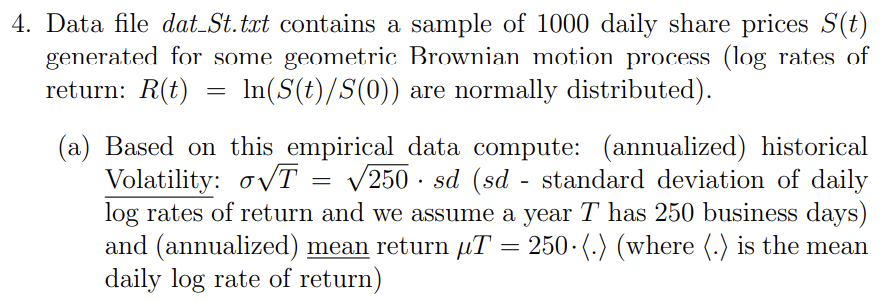

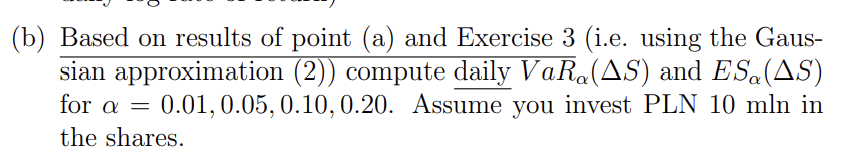

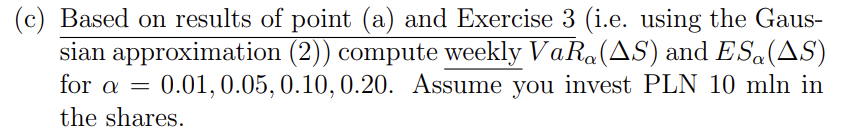

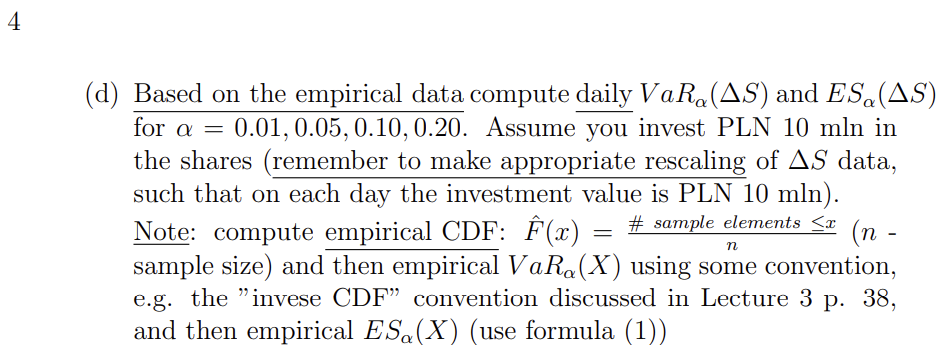

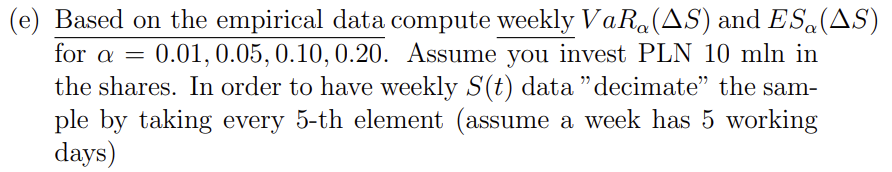

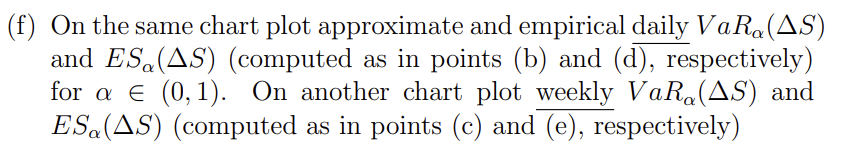

FINANCIAL RISK ANALYSIS - VaR AND EXPECTED SHORTFALL
Number of observations: 1001
Number of daily returns: 1000

PART (A) - HISTORICAL STATISTICS
----------------------------------------
Daily mean return: 0.000444
Daily volatility: 0.012760
Annualized mean return: 0.1109 (11.09%)
Annualized volatility: 0.2018 (20.18%)

PART (B) - DAILY VaR AND ES (GAUSSIAN APPROXIMATION)
------------------------------------------------------------
Alpha    VaR (PLN)       ES (PLN)       
---------------------------------------------
0.01         -301,286      335,650
0.05         -214,325      258,770
0.1          -167,967      219,502
0.2          -111,831      174,181

PART (C) - WEEKLY VaR AND ES (GAUSSIAN APPROXIMATION)
------------------------------------------------------------
Alpha    VaR (PLN)       ES (PLN)       
---------------------------------------------
0.01         -685,962      738,271
0.05         -491,512      566,360
0.1          -387,852      478,556
0.2          -262,327      37

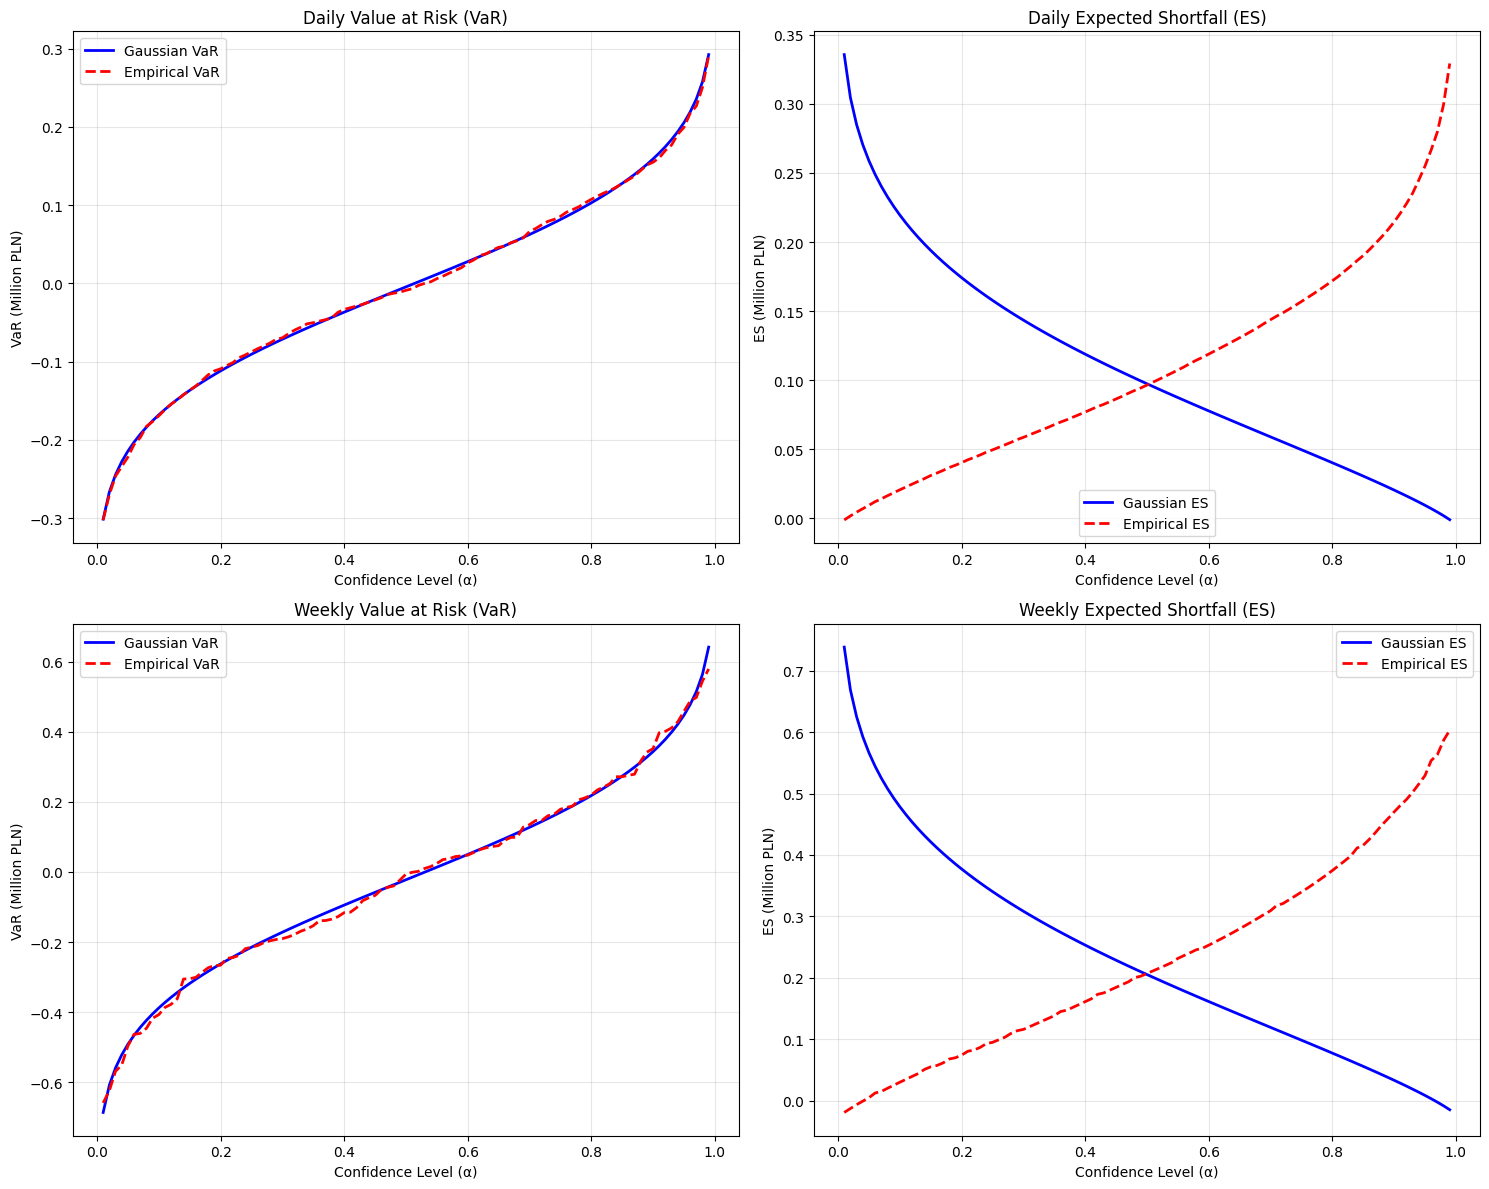

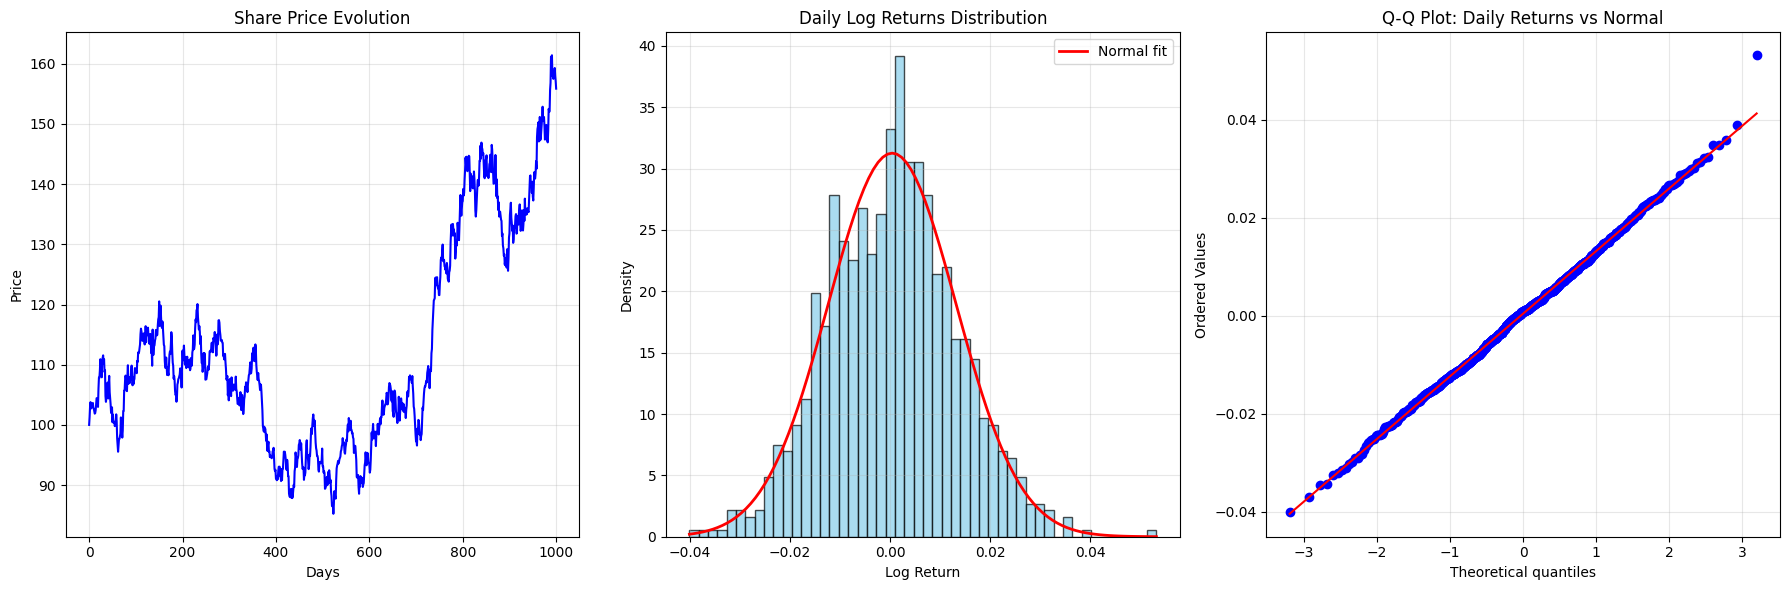


ANALYSIS COMPLETE!
The plots show the comparison between Gaussian and empirical methods.
Key observations:
- Empirical VaR/ES may differ from Gaussian due to non-normal distribution
- Weekly risk measures are higher than daily (longer time horizon)
- The Q-Q plot shows deviation from normality in the tails


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load the data from the file
data_string = """100.
101.3
103.05
103.78
102.72
103.10
102.99
103.09
103.64
102.76
102.71
102.31
101.87
101.96
102.45
103.41
104.43
104.45
104.24
102.99
105.99
107.86
107.81
109.02
110.91
110.15
108.66
107.91
110.74
111.12
111.55
110.14
110.9
108.8
109.06
104.78
103.83
104.55
105.66
106.95
107.04
104.39
106.93
108.14
105.43
104.41
103.43
102.04
101.93
102.92
100.44
101.72
100.43
100.34
100.52
99.8
100.25
100.37
101.75
100.60
97.8
96.57
95.54
96.53
97.69
97.67
98.13
98.58
101.24
99.45
98.81
97.89
99.04
102.28
102.32
105.69
105.7
107.46
108.19
107.62
106.47
105.61
108.17
109.91
106.82
106.94
107.88
106.95
107.93
107.43
109.06
109.85
108.59
106.58
107.95
106.77
107.37
107.66
109.43
109.37
108.82
108.97
108.59
110.64
110.47
112.05
111.89
112.14
112.82
113.38
115.08
115.99
115.57
115.08
113.96
114.55
114.25
115.2
113.67
113.36
113.72
116.4
113.74
115.16
114.91
115.26
116.15
114.84
114.77
113.48
114.98
115.11
113.57
111.93
112.36
109.83
115.83
111.63
111.68
113.08
113.23
114.
114.37
115.78
115.76
114.87
114.97
116.55
117.54
117.89
120.52
116.43
118.45
119.82
117.91
116.47
116.12
117.18
116.08
114.62
113.3
113.10
110.60
109.49
109.54
111.19
109.83
108.28
109.51
108.71
108.25
110.
111.68
112.18
111.77
113.35
115.4
114.63
112.09
110.34
109.82
107.69
108.13
107.44
105.63
104.97
105.11
103.85
104.52
106.7
107.01
107.61
107.74
108.06
108.38
109.39
108.10
108.61
106.21
109.99
112.34
110.73
111.98
113.18
111.48
110.05
111.21
109.98
109.44
110.53
111.33
109.63
110.73
109.57
110.72
110.84
109.08
109.31
111.10
110.07
109.84
112.03
112.53
114.87
112.55
112.67
113.33
116.05
117.52
117.06
119.05
119.2
120.07
117.91
116.91
115.86
116.42
115.51
113.42
114.76
111.92
110.27
110.38
108.82
109.43
111.93
111.35
111.91
111.26
107.51
107.57
107.58
108.13
108.62
109.59
109.76
109.18
110.14
112.16
112.32
112.25
112.17
113.57
113.66
113.17
112.06
114.43
114.24
114.37
115.43
114.07
113.14
111.49
111.66
115.01
113.35
113.75
117.35
117.4
116.98
115.59
114.96
113.98
114.01
114.11
113.7
113.64
111.48
111.73
110.89
111.58
111.8
110.36
109.29
107.53
107.72
108.11
104.93
105.85
104.08
106.15
107.61
105.99
105.39
104.78
107.89
106.49
106.81
105.68
105.84
106.
106.12
106.68
105.85
108.02
105.98
105.58
104.61
103.48
103.58
104.45
104.28
103.23
104.7
105.44
103.95
102.45
104.99
104.92
103.12
101.8
102.53
104.28
104.74
106.34
105.81
107.07
105.95
106.34
105.45
106.68
107.49
108.26
108.46
109.36
110.38
108.54
108.62
109.35
111.88
110.64
112.47
112.83
110.7
111.25
110.58
113.37
112.47
109.95
108.82
108.10
107.44
108.63
107.61
107.24
106.65
105.79
106.74
106.64
105.46
103.79
102.43
99.81
99.35
98.92
99.7
98.79
99.38
98.71
97.37
98.42
96.42
95.66
96.67
97.2
95.52
95.64
94.66
94.95
94.62
94.58
94.46
94.71
95.62
95.7
96.19
94.52
92.69
92.32
92.54
91.09
90.94
90.81
91.51
90.97
92.36
93.05
92.97
93.06
91.46
91.45
90.67
92.65
90.84
92.69
92.73
94.28
95.56
95.09
95.54
95.02
94.26
92.81
92.52
94.19
93.49
91.48
91.47
88.58
88.14
88.01
88.02
89.34
87.91
89.35
87.84
88.15
89.2
90.03
89.67
92.31
92.88
95.42
94.77
94.33
93.01
94.31
94.51
94.98
96.68
96.91
97.48
97.09
95.92
96.92
95.18
93.74
92.69
92.86
92.93
90.87
91.85
91.61
92.08
94.26
96.61
97.44
94.88
95.02
93.99
92.65
93.28
95.04
94.81
96.32
98.61
99.45
98.48
100.04
101.15
101.73
100.66
99.81
100.71
98.76
97.05
96.13
95.75
94.86
94.85
94.43
92.57
92.24
93.82
93.78
93.8
93.60
93.83
94.22
96.07
93.13
93.13
92.08
92.29
92.02
89.38
89.5
89.79
90.71
91.36
89.98
90.23
92.19
91.71
92.46
91.69
90.35
90.86
88.91
88.2
86.54
86.46
86.56
85.23
86.76
88.98
87.81
88.16
87.76
90.88
92.77
93.25
93.54
94.02
93.58
93.84
94.29
94.54
94.74
95.61
95.83
96.46
96.73
97.8
96.86
97.14
96.69
95.4
95.21
96.27
96.78
97.58
97.34
99.23
100.05
98.92
101.14
100.11
99.75
99.23
100.69
99.21
99.15
98.58
98.69
97.92
97.69
95.34
96.4
96.53
96.49
95.27
94.16
91.35
91.23
91.67
91.67
89.63
88.56
90.56
89.75
91.49
91.05
90.4
91.23
91.09
89.69
90.11
90.33
91.98
93.3
93.77
95.44
94.45
93.29
94.74
95.35
94.75
93.7
93.69
93.39
92.07
92.53
94.12
96.26
98.73
97.57
99.04
100.16
98.51
97.76
98.46
98.89
98.53
96.48
98.37
98.86
98.68
100.17
98.85
98.41
99.35
100.4
101.12
100.11
101.27
101.23
103.
104.05
102.43
101.68
101.73
102.81
103.12
103.38
103.4
104.23
105.33
105.12
103.4
103.63
104.63
106.32
106.95
106.81
106.5
105.92
104.18
103.91
105.58
102.31
102.
101.34
105.36
105.71
105.43
104.22
102.22
101.86
100.98
100.31
101.33
101.57
104.67
103.12
100.71
102.19
103.01
104.4
103.60
102.59
103.62
102.75
102.26
103.41
102.12
102.84
102.3
101.14
102.5
103.23
105.29
105.57
104.72
105.60
107.97
107.48
108.23
107.78
107.68
107.56
106.98
108.12
106.43
105.21
103.05
102.66
101.48
99.92
98.38
97.25
97.51
96.57
99.38
98.47
100.83
100.73
99.55
98.34
98.53
97.47
98.19
98.48
100.45
102.86
102.46
103.92
105.21
106.06
106.4
106.4
106.94
107.33
107.05
108.65
109.13
109.78
108.54
109.04
106.10
108.54
109.3
108.96
111.92
112.62
115.78
117.31
119.09
120.66
120.83
121.06
124.34
124.49
123.2
123.82
124.54
123.17
122.66
123.02
121.57
121.56
123.46
124.57
127.4
127.81
127.44
128.88
129.96
127.19
127.42
127.42
126.35
126.23
125.76
126.45
125.16
126.9
126.18
124.25
124.07
123.8
125.37
125.63
126.43
130.31
132.23
133.3
131.45
132.13
133.38
132.31
132.47
131.39
131.84
127.63
128.7
130.48
129.78
130.96
133.58
132.68
132.07
130.69
133.47
135.64
138.19
135.99
134.76
136.03
137.1
137.16
139.20
138.1
138.56
140.81
142.37
144.41
143.33
144.55
142.82
142.15
142.81
144.35
144.71
144.62
141.67
138.84
141.73
140.05
139.56
139.44
141.28
139.29
139.87
142.1
140.87
138.96
135.58
134.61
135.66
137.61
139.12
140.65
140.69
139.76
141.32
143.91
143.83
146.39
144.24
146.9
146.07
145.81
144.87
145.13
143.41
141.36
140.98
143.3
144.01
144.14
144.78
141.34
141.97
141.82
141.01
141.88
143.33
143.51
144.88
143.56
141.99
146.52
145.76
143.96
142.57
140.07
140.1
140.21
142.12
144.84
142.04
137.99
140.78
137.68
137.95
135.7
136.99
134.61
135.09
135.43
134.79
134.11
133.88
131.39
131.8
129.81
129.34
128.08
128.35
126.65
127.34
126.45
127.76
126.14
129.18
126.63
125.60
127.8
131.14
131.82
134.86
135.87
136.91
134.43
133.51
132.24
133.13
130.24
130.86
132.51
132.97
133.22
134.65
135.02
131.77
131.86
134.68
133.91
133.28
134.94
135.67
136.63
133.38
132.24
132.79
133.23
135.65
133.29
132.3
133.39
135.66
133.9
137.59
135.18
134.93
135.75
134.97
135.99
135.84
135.51
135.34
137.4
139.92
141.31
141.45
139.52
140.34
138.55
140.4
137.93
137.28
139.31
141.97
140.94
140.92
141.8
143.81
142.55
147.77
149.16
149.57
150.27
147.09
147.20
151.16
147.31
147.57
148.70
149.97
151.01
152.86
150.54
150.73
151.15
149.66
147.4
148.13
149.34
149.83
149.13
147.23
146.94
148.89
152.5
152.1
152.07
155.64
156.83
161.17
159.31
161.41
157.94
158.75
157.49
157.87
158.47
159.29
157.96
157.1
155.86"""

# Parse prices
prices = np.array([float(x) for x in data_string.strip().split('\n')])

# Calculate daily log returns
log_returns = np.diff(np.log(prices))

print("="*80)
print("FINANCIAL RISK ANALYSIS - VaR AND EXPECTED SHORTFALL")
print("="*80)
print(f"Number of observations: {len(prices)}")
print(f"Number of daily returns: {len(log_returns)}")
print()

# Part (a): Calculate historical statistics
daily_mean = np.mean(log_returns)
daily_std = np.std(log_returns, ddof=1)  # Sample standard deviation
annualized_mean = 250 * daily_mean
annualized_volatility = np.sqrt(250) * daily_std

print("PART (A) - HISTORICAL STATISTICS")
print("-" * 40)
print(f"Daily mean return: {daily_mean:.6f}")
print(f"Daily volatility: {daily_std:.6f}")
print(f"Annualized mean return: {annualized_mean:.4f} ({annualized_mean*100:.2f}%)")
print(f"Annualized volatility: {annualized_volatility:.4f} ({annualized_volatility*100:.2f}%)")
print()

# Parameters
alphas = [0.01, 0.05, 0.10, 0.20]
investment = 10_000_000  # PLN 10 million

# Function to calculate Gaussian VaR and ES
def gaussian_var_es(mu, sigma, alpha, investment=10_000_000):
    z_alpha = stats.norm.ppf(alpha)
    var = investment * (-mu + sigma * z_alpha)
    phi_z = stats.norm.pdf(z_alpha)
    es = investment * (-mu + sigma * phi_z / alpha)
    return var, es

# Function to calculate empirical VaR and ES
def empirical_var_es(returns, alpha, investment=10_000_000):
    losses = -returns * investment
    sorted_losses = np.sort(losses)
    n = len(sorted_losses)
    quantile_index = int(np.ceil(alpha * n)) - 1
    quantile_index = max(0, min(quantile_index, n-1))
    var = sorted_losses[quantile_index]
    tail_losses = sorted_losses[quantile_index:]
    es = np.mean(tail_losses) if len(tail_losses) > 0 else var
    return var, es

# Part (b): Daily VaR and ES using Gaussian approximation
print("PART (B) - DAILY VaR AND ES (GAUSSIAN APPROXIMATION)")
print("-" * 60)
print(f"{'Alpha':<8} {'VaR (PLN)':<15} {'ES (PLN)':<15}")
print("-" * 45)

for alpha in alphas:
    var, es = gaussian_var_es(daily_mean, daily_std, alpha, investment)
    print(f"{alpha:<8} {var:>12,.0f} {es:>12,.0f}")
print()

# Part (c): Weekly VaR and ES using Gaussian approximation
weekly_mean = 5 * daily_mean
weekly_std = np.sqrt(5) * daily_std

print("PART (C) - WEEKLY VaR AND ES (GAUSSIAN APPROXIMATION)")
print("-" * 60)
print(f"{'Alpha':<8} {'VaR (PLN)':<15} {'ES (PLN)':<15}")
print("-" * 45)

for alpha in alphas:
    var, es = gaussian_var_es(weekly_mean, weekly_std, alpha, investment)
    print(f"{alpha:<8} {var:>12,.0f} {es:>12,.0f}")
print()

# Part (d): Daily empirical VaR and ES
print("PART (D) - DAILY VaR AND ES (EMPIRICAL)")
print("-" * 45)
print(f"{'Alpha':<8} {'VaR (PLN)':<15} {'ES (PLN)':<15}")
print("-" * 45)

for alpha in alphas:
    var, es = empirical_var_es(log_returns, alpha, investment)
    print(f"{alpha:<8} {var:>12,.0f} {es:>12,.0f}")
print()

# Part (e): Weekly empirical VaR and ES
weekly_prices = prices[::5]  # Take every 5th price
weekly_log_returns = np.diff(np.log(weekly_prices))

print("PART (E) - WEEKLY VaR AND ES (EMPIRICAL)")
print("-" * 45)
print(f"Number of weekly observations: {len(weekly_prices)}")
print(f"Number of weekly returns: {len(weekly_log_returns)}")
print()
print(f"{'Alpha':<8} {'VaR (PLN)':<15} {'ES (PLN)':<15}")
print("-" * 45)

for alpha in alphas:
    var, es = empirical_var_es(weekly_log_returns, alpha, investment)
    print(f"{alpha:<8} {var:>12,.0f} {es:>12,.0f}")
print()

# Part (f): Plotting VaR and ES across different alpha values
alpha_range = np.linspace(0.01, 0.99, 99)

# Calculate VaR and ES for range of alphas
daily_gaussian_var = []
daily_gaussian_es = []
daily_empirical_var = []
daily_empirical_es = []
weekly_gaussian_var = []
weekly_gaussian_es = []
weekly_empirical_var = []
weekly_empirical_es = []

for alpha in alpha_range:
    # Daily Gaussian
    var, es = gaussian_var_es(daily_mean, daily_std, alpha, investment)
    daily_gaussian_var.append(var)
    daily_gaussian_es.append(es)
    
    # Daily Empirical
    var, es = empirical_var_es(log_returns, alpha, investment)
    daily_empirical_var.append(var)
    daily_empirical_es.append(es)
    
    # Weekly Gaussian
    var, es = gaussian_var_es(weekly_mean, weekly_std, alpha, investment)
    weekly_gaussian_var.append(var)
    weekly_gaussian_es.append(es)
    
    # Weekly Empirical
    var, es = empirical_var_es(weekly_log_returns, alpha, investment)
    weekly_empirical_var.append(var)
    weekly_empirical_es.append(es)

# Create plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Daily VaR
ax1.plot(alpha_range, np.array(daily_gaussian_var)/1e6, 'b-', label='Gaussian VaR', linewidth=2)
ax1.plot(alpha_range, np.array(daily_empirical_var)/1e6, 'r--', label='Empirical VaR', linewidth=2)
ax1.set_xlabel('Confidence Level (α)')
ax1.set_ylabel('VaR (Million PLN)')
ax1.set_title('Daily Value at Risk (VaR)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Daily ES
ax2.plot(alpha_range, np.array(daily_gaussian_es)/1e6, 'b-', label='Gaussian ES', linewidth=2)
ax2.plot(alpha_range, np.array(daily_empirical_es)/1e6, 'r--', label='Empirical ES', linewidth=2)
ax2.set_xlabel('Confidence Level (α)')
ax2.set_ylabel('ES (Million PLN)')
ax2.set_title('Daily Expected Shortfall (ES)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Weekly VaR
ax3.plot(alpha_range, np.array(weekly_gaussian_var)/1e6, 'b-', label='Gaussian VaR', linewidth=2)
ax3.plot(alpha_range, np.array(weekly_empirical_var)/1e6, 'r--', label='Empirical VaR', linewidth=2)
ax3.set_xlabel('Confidence Level (α)')
ax3.set_ylabel('VaR (Million PLN)')
ax3.set_title('Weekly Value at Risk (VaR)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Weekly ES
ax4.plot(alpha_range, np.array(weekly_gaussian_es)/1e6, 'b-', label='Gaussian ES', linewidth=2)
ax4.plot(alpha_range, np.array(weekly_empirical_es)/1e6, 'r--', label='Empirical ES', linewidth=2)
ax4.set_xlabel('Confidence Level (α)')
ax4.set_ylabel('ES (Million PLN)')
ax4.set_title('Weekly Expected Shortfall (ES)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional plots: Distribution analysis
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Price evolution
ax1.plot(prices, 'b-', linewidth=1.5)
ax1.set_title('Share Price Evolution')
ax1.set_xlabel('Days')
ax1.set_ylabel('Price')
ax1.grid(True, alpha=0.3)

# Daily returns distribution
ax2.hist(log_returns, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
x = np.linspace(log_returns.min(), log_returns.max(), 100)
ax2.plot(x, stats.norm.pdf(x, daily_mean, daily_std), 'r-', linewidth=2, label='Normal fit')
ax2.set_title('Daily Log Returns Distribution')
ax2.set_xlabel('Log Return')
ax2.set_ylabel('Density')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Q-Q plot
stats.probplot(log_returns, dist="norm", plot=ax3)
ax3.set_title('Q-Q Plot: Daily Returns vs Normal')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nANALYSIS COMPLETE!")
print("The plots show the comparison between Gaussian and empirical methods.")
print("Key observations:")
print("- Empirical VaR/ES may differ from Gaussian due to non-normal distribution")
print("- Weekly risk measures are higher than daily (longer time horizon)")
print("- The Q-Q plot shows deviation from normality in the tails")